In [24]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:


#create a function to convert yearly apr to monthly apr
def yearly_to_monthly(yearly_apr):
    monthly_apr = yearly_apr/12
    return monthly_apr

def monthly_apr_to_daily(monthly_apr):
    daily_apr = monthly_apr/30
    return daily_apr

In [26]:
celo_price = 3.16 #Celo price in CUSD

target_prices = [celo_price + 0.2, celo_price + 0.55, celo_price + 1]

#create an array with mock apr rates
# apr for BORROWED ASSETS EXAMPLE
apr_rates = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
delta_days = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30])

max_lev = 3.5 #max leverage (this means you can borrow up to 3.5x val of your collateral)

deposit_amount = 100 #in CUSD
#convert apr to monthly apr
monthly_apr = yearly_to_monthly(apr_rates)
daily_apr = monthly_apr_to_daily(monthly_apr) # % per day owed on borrowed assets


# calc the interest owed on borrowed assets
def total_interest_owed(daily_apr, days, deposit_amount):
    balance = deposit_amount
    interest_owed = 0
    for i in range(days):
        interest_owed += balance * daily_apr
        balance += interest_owed
    return interest_owed



def calc_end(
    end_price, # price of borrowed assets
    d_days, # time interval of the option - in terms of days
    borrowed_quantity, # quantity of borrowed assets
    deposit_amount # amount of collateral deposited
):

    # calculate the value of the borrowed assets after the option expires
    total_interest = total_interest_owed(daily_apr, d_days, deposit_amount)
    end_value = (end_price * borrowed_quantity) - total_interest
    return end_value



In [27]:
#create a random array of celo prices between the target prices
celo_prices = np.random.uniform(low=target_prices[0], high=target_prices[-1], size=10)
celo_prices

array([3.97484161, 3.85041565, 3.52599845, 4.09713278, 3.97860091,
       3.71927846, 3.80426437, 3.65566857, 3.91006846, 3.47044733])

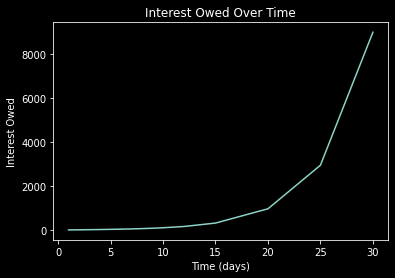

In [28]:
borrowed_apr = 0.05 #apr of the borrowed assets


# calc interest for 
owed = [ total_interest_owed(borrowed_apr,d,100) for d in delta_days]

# graph the interest owed over time
plt.plot(delta_days, owed)
plt.xlabel('Time (days)')
plt.ylabel('Interest Owed')
plt.title('Interest Owed Over Time')

#show table in the plot
df = pd.DataFrame(
    {'Days': delta_days,
        'Interest Owed': owed,
    }
)

        

plt.show()

In [31]:
# create an option object and compute the final value of the option for each price
options_values = []
borrowed_quantity = deposit_amount * 2.2
for p in celo_prices:
    for d in delta_days:
            
        options_values.append({
            'end_price': p,
            'end_value': calc_end(p, 10, borrowed_quantity, deposit_amount).round(2),
            "% celo change": (p - celo_price)/celo_price * 100,
            'avg % change per day': (p - celo_price)/celo_price * 100 / d,
            'days':d
        })
options_values = pd.DataFrame(options_values)



,end_price,end_value,% celo change,avg % change per day,days
0,3.974842,"[874.33, 874.19, 874.05, 873.9, 873.76, 873.62...",25.786127,25.786127,1
1,3.974842,"[874.33, 874.19, 874.05, 873.9, 873.76, 873.62...",25.786127,12.893063,2
2,3.974842,"[874.33, 874.19, 874.05, 873.9, 873.76, 873.62...",25.786127,8.595376,3
3,3.974842,"[874.33, 874.19, 874.05, 873.9, 873.76, 873.62...",25.786127,6.446532,4
4,3.974842,"[874.33, 874.19, 874.05, 873.9, 873.76, 873.62...",25.786127,5.157225,5
...,...,...,...,...,...
145,3.470447,"[763.36, 763.22, 763.08, 762.94, 762.8, 762.65...",9.824283,0.818690,12
146,3.470447,"[763.36, 763.22, 763.08, 762.94, 762.8, 762.65...",9.824283,0.654952,15
147,3.470447,"[763.36, 763.22, 763.08, 762.94, 762.8, 762.65...",9.824283,0.491214,20
148,3.470447,"[763.36, 763.22, 763.08, 762.94, 762.8, 762.65...",9.824283,0.392971,25


In [30]:
df.set_index('Days', inplace=True)

